In [1]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c cifar-10

 97% 694M/715M [00:11<00:00, 101MB/s] 
100% 715M/715M [00:11<00:00, 65.7MB/s]


In [4]:
!ls


kaggle.json  sample_data


In [8]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 16.7 MB/s eta 0:00:00


In [24]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [25]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [26]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [27]:
filename = os.listdir('/content/train')


In [28]:
type(filename)

list

In [29]:
len(filename)

50001

In [30]:
print(filename[0:5])
print(filename[-5:])

['43926.png', '48780.png', '31482.png', '46200.png', '48169.png']
['8297.png', '18770.png', '27694.png', '23241.png', '5339.png']


In [32]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [33]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [34]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [35]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [36]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [37]:
labels_dictionary = {'airplane' : 0, 'automobile' : 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9 }

In [38]:
labels = [labels_dictionary[i] for i in labels_df['label']]

In [39]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


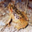

In [45]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

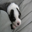

In [46]:
import cv2
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/train/45888.png')
cv2_imshow(img1)

In [47]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [49]:
id_list = list(labels_df['id'])

In [50]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


## Converting images to numpy array

In [56]:
train_data_folder = '/content/train/'
data = []
for id in id_list:
  img = Image.open(train_data_folder + str(id) + '.png')
  img = np.array(img)
  data.append(img)

In [58]:
type(img)

numpy.ndarray

In [59]:
len(data)

50000

In [60]:
type(data[0])

numpy.ndarray

In [61]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
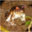

In [62]:
data[0]

## Convert image list and label list to numpy arrays

In [63]:
X = np.array(data)
y = np.array(labels)

In [64]:
type(X)

numpy.ndarray

In [65]:
print(X.shape)

(50000, 32, 32, 3)


In [66]:
print(y.shape)

(50000,)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
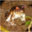

In [67]:
X[0]

In [70]:
y[0]

np.int64(6)

In [72]:
labels_df[labels_df['id'] == 6]

,id,label
5,6,automobile


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [74]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [76]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

Building the nueral network

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [79]:
num_of_classes= 10

## We can customize the network layers
model = Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.get_weights()

[array([[-0.02593417,  0.03589126, -0.00808378, ...,  0.01805967,
         -0.02574333, -0.00348845],
        [ 0.03524897,  0.04153996,  0.03604585, ...,  0.00131397,
         -0.01901885,  0.01755357],
        [ 0.01653902,  0.00382174,  0.01888746, ...,  0.03904686,
          0.00491275,  0.01579749],
        ...,
        [-0.00808636,  0.0034192 , -0.01120146, ..., -0.0434011 ,
         -0.0241146 , -0.02315271],
        [-0.02624347, -0.02552897, -0.0433354 , ..., -0.01802083,
         -0.02198175,  0.02371853],
        [ 0.03189186,  0.01737222,  0.00869056, ...,  0.00688856,
          0.02262377,  0.04358889]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 6.14966452e-02, -9.80942696e-02,  2.2118344

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2373 - loss: 2.0988 - val_accuracy: 0.3167 - val_loss: 1.8719
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3251 - loss: 1.8679 - val_accuracy: 0.3537 - val_loss: 1.7892
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3454 - loss: 1.8171 - val_accuracy: 0.3530 - val_loss: 1.7911
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3509 - loss: 1.7974 - val_accuracy: 0.3240 - val_loss: 1.8640
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3662 - loss: 1.7715 - val_accuracy: 0.3738 - val_loss: 1.7635
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3704 - loss: 1.7489 - val_accuracy: 0.3733 - val_loss: 1.7298
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3814 - loss: 1.7371 - val_accuracy: 0.3692 - val_loss: 1.7363
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3763 - loss: 1.7434

TransferLearning - Resnet50

In [89]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Dropout, Dense,Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [91]:
convolutional_base = ResNet50(weights='imagenet', include_top = False, input_shape=(256,256,3))

In [93]:
 convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [96]:
model1 = models.Sequential()
model1.add(layers.UpSampling2D((2,2)))
model1.add(layers.UpSampling2D((2,2)))
model1.add(layers.UpSampling2D((2,2)))
model1.add(convolutional_base)
model1.add(layers.Flatten())
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(num_of_classes, activation='softmax'))

In [105]:
model1.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-102-772706843.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


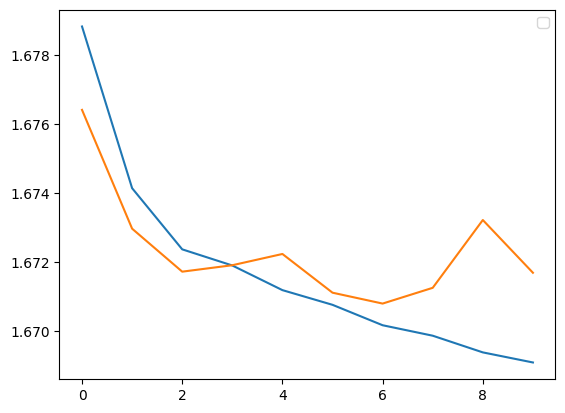

/tmp/ipython-input-102-772706843.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


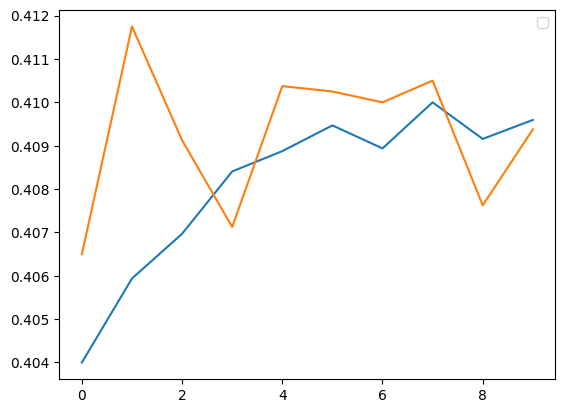

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()

In [104]:
loss, accuracy = model1.evaluate(X_test_scaled, y_test)
print('Test accuracy: ', accuracy)

ValueError: You must call `compile()` before using the model.